In [2]:
%pip install BeautifulSoup4


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import os
import json
import time
import random
import zipfile
import requests
import pandas as pd
from bs4 import BeautifulSoup

C:\Users\pc\AppData\Local\Temp\ipykernel_11764\1206345109.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Class Explanation: `NewsScraper`

## Overview
The `NewsScraper` class is designed for scraping news articles from three different Urdu news websites: Geo, Jang, and Express. The class has methods that cater to each site's unique structure and requirements. Below, we will go through the class and its methods, detailing what each function does, the input it takes, and the output it returns.

## Class Definition

```python
class NewsScraper:
    def __init__(self, id_=0):
        self.id = id_
```


## Method 1: `get_express_articles`

### Description
Scrapes news articles from the Express website across categories like saqafat (entertainment), business, sports, science-technology, and world. The method navigates through multiple pages for each category to gather a more extensive dataset.

### Input
- **`max_pages`**: The number of pages to scrape for each category (default is 7).

### Process
- Iterates over each category and page.
- Requests each category page and finds article cards within `<ul class='tedit-shortnews listing-page'>`.
- Extracts the article's headline, link, and content by navigating through `<div class='horiz-news3-caption'>` and `<span class='story-text'>`.

### Output
- **Returns**: A tuple of:
  - A Pandas DataFrame containing columns: `id`, `title`, and `link`).
  - A dictionary `express_contents` where the key is the article ID and the value is the article content.

### Data Structure
- Article cards are identified by `<li>` tags.
- Content is structured within `<span class='story-text'>` and `<p>` tags.



In [ ]:
class NewsScraper:
    def __init__(self,id_=0):
        self.id = id_


  # write functions to scrape from other websites


    def get_express_articles(self, max_pages=1):
        express_df = {
            "id": [],
            "title": [],
            "link": [],
            "content": [],
            "gold_label": [],
        }
        base_url = 'https://www.express.pk'
        categories = ['saqafat', 'business', 'sports', 'science', 'world']   # saqafat is entertainment category

        # Iterating over the specified number of pages
        for category in categories:
            for page in range(1, max_pages + 1):
                print(f"Scraping page {page} of category '{category}'...")
                url = f"{base_url}/{category}/archives?page={page}"
                response = requests.get(url)
                response.raise_for_status()
                soup = BeautifulSoup(response.text, "html.parser")

                # Finding article cards
                cards = soup.find('ul', class_='tedit-shortnews listing-page').find_all('li')  # Adjust class as per actual site structure
                print(f"\t--> Found {len(cards)} articles on page {page} of '{category}'.")

                success_count = 0

                for card in cards:
                    try:
                        div = card.find('div',class_='horiz-news3-caption')

                        # Article Title
                        headline = div.find('a').get_text(strip=True).replace('\xa0', ' ')

                        # Article link
                        link = div.find('a')['href']

                        # Requesting the content from each article's link
                        article_response = requests.get(link)
                        article_response.raise_for_status()
                        content_soup = BeautifulSoup(article_response.text, "html.parser")


                        # Content arranged in paras inside <span> tags
                        paras = content_soup.find('span',class_='story-text').find_all('p')

                        combined_text = " ".join(
                        p.get_text(strip=True).replace('\xa0', ' ').replace('\u200b', '')
                        for p in paras if p.get_text(strip=True)
                        )

                        # Storing data
                        express_df['id'].append(self.id)
                        express_df['title'].append(headline)
                        express_df['link'].append(link)
                        express_df['gold_label'].append(category.replace('saqafat','entertainment').replace('science','science-technology'))
                        express_df['content'].append(combined_text)

                        # Increment ID and success count
                        self.id += 1
                        success_count += 1

                    except Exception as e:
                        print(f"\t--> Failed to scrape an article on page {page} of '{category}': {e}")

                print(f"\t--> Successfully scraped {success_count} articles from page {page} of '{category}'.")
            print('')

        return pd.DataFrame(express_df)
    d def get_express_articles(self, max_pages=7):
        express_df = {
            "id": [],
            "title": [],
            "link": [],
            "content": [],
            "gold_label": [],
        }
        base_url = 'https://www.express.pk'
        categories = ['saqafat', 'business', 'sports', 'science', 'world']   # saqafat is entertainment category

        # Iterating over the specified number of pages
        for category in categories:
            for page in range(1, max_pages + 1):
                print(f"Scraping page {page} of category '{category}'...")
                url = f"{base_url}/{category}/archives?page={page}"
                response = requests.get(url)
                response.raise_for_status()
                soup = BeautifulSoup(response.text, "html.parser")

                # Finding article cards
                cards = soup.find('ul', class_='tedit-shortnews listing-page').find_all('li')  # Adjust class as per actual site structure
                print(f"\t--> Found {len(cards)} articles on page {page} of '{category}'.")

                success_count = 0

                for card in cards:
                    try:
                        div = card.find('div',class_='horiz-news3-caption')

                        # Article Title
                        headline = div.find('a').get_text(strip=True).replace('\xa0', ' ')

                        # Article link
                        link = div.find('a')['href']

                        # Requesting the content from each article's link
                        article_response = requests.get(link)
                        article_response.raise_for_status()
                        content_soup = BeautifulSoup(article_response.text, "html.parser")


                        # Content arranged in paras inside <span> tags
                        paras = content_soup.find('span',class_='story-text').find_all('p')

                        combined_text = " ".join(
                        p.get_text(strip=True).replace('\xa0', ' ').replace('\u200b', '')
                        for p in paras if p.get_text(strip=True)
                        )

                        # Storing data
                        express_df['id'].append(self.id)
                        express_df['title'].append(headline)
                        express_df['link'].append(link)
                        express_df['gold_label'].append(category.replace('saqafat','entertainment').replace('science','science-technology'))
                        express_df['content'].append(combined_text)

                        # Increment ID and success count
                        self.id += 1
                        success_count += 1

                    except Exception as e:
                        print(f"\t--> Failed to scrape an article on page {page} of '{category}': {e}")

                print(f"\t--> Successfully scraped {success_count} articles from page {page} of '{category}'.")
            print('')

        return pd.DataFrame(express_df)
    
    def get_jang_articles(self, max_pages=1):
        jangnews_df = {
            "id": [],
            "title": [],
            "link": [],
            "content": [],
            "gold_label": [],
        }
        base_url = 'https://jang.com.pk/category/latest-news'
        categories = ['science-and-technology', 'sports', 'entertainment', 'business']  # Adjust as needed

        # Iterating over the specified categories
        for category in categories:
            print(f"Scraping category '{category}'...")
            url = f"{base_url}/{category}"
            print("Url: ", url)
            
            try:
                response = requests.get(url)
                response.raise_for_status()
                soup = BeautifulSoup(response.text, "html.parser")
                cards = soup.find('ul', class_='scrollPaginationNew__').find_all('li')  # Adjust class as needed
                print(f"\t--> Found {len(cards)} articles of '{category}'.")
                
                success_count = 0
                for card in cards:
                    try:
                        headline_tag = card.find('div', class_='main-heading').find('a')
                        headline = headline_tag.get_text(strip=True)
                        link = headline_tag['href']

                        article_response = requests.get(link)
                        article_response.raise_for_status()
                        content_soup = BeautifulSoup(article_response.text, "html.parser")
                        paras = content_soup.find('div', class_='detail-right').find_all('p')
                        combined_text = " ".join(
                            p.get_text(strip=True).replace('\xa0', ' ').replace('\u200b', '')
                            for p in paras if p.get_text(strip=True)
                        )

                        jangnews_df['id'].append(self.id)
                        jangnews_df['title'].append(headline)
                        jangnews_df['link'].append(link)
                        jangnews_df['gold_label'].append(category)
                        jangnews_df['content'].append(combined_text)

                        # Increment ID and success count
                        self.id += 1
                        success_count += 1

                    except Exception as e:
                        print(f"\t--> Failed to scrape an article of '{category}': {e}")

                print(f"\t--> Successfully scraped {success_count} articles of '{category}'.")
                print('')

            except Exception as e:
                print(f"Failed to retrieve the category page for '{category}': {e}")

        return pd.DataFrame(jangnews_df)
    
    def get_duniya(self, max_pages=7):
        dunya_df = {
            "id": [],
            "title": [],
            "link": [],
            "content": [],
            "gold_label": [],
        }
        base_url = 'https://urdu.dunyanews.tv/index.php/ur'
        categories = ['Entertainment', 'Business', 'Sports', 'Technology', 'World']   # saqafat is entertainment category

        # Iterating over the specified number of pages
        for category in categories:
            for page in range(1, max_pages + 1):
                print(f"Scraping page {page} of category '{category}'...")
                url = f"{base_url}/{category}"
                print(url)
                response = requests.get(url)
                response.raise_for_status()
                soup = BeautifulSoup(response.text, "html.parser")

                # Finding article cards
                cards = soup.find('div', class_='newsBox categories').find_all('div')  # Adjust class as per actual site structure
                print(f"\t--> Found {len(cards)} articles on page {page} of '{category}'.")

                success_count = 0

                for card in cards:
                    try:
                        
                        div = card.find('div',class_='col-md-4')
                        
                        # Article Title
                        headline = div.find('a').get_text(strip=True).replace('\xa0', ' ')
                        
                        # Article link
                        base_url2='https://urdu.dunyanews.tv'
                        link = base_url2+div.find('a')['href']
                    

                        # Requesting the content from each article's link
                        article_response = requests.get(link)
                        article_response.raise_for_status()
                        content_soup = BeautifulSoup(article_response.text, "html.parser")
                       # print(content_soup)
                        

                        # Content arranged in paras inside <span> tags
                        paras = content_soup.find('div',class_='main-news col-md-12').find_all('p')
                        
                        combined_text = " ".join(
                        p.get_text(strip=True).replace('\xa0', ' ').replace('\u200b', '')
                        for p in paras if p.get_text(strip=True)
                        )
                        print(combined_text)

                        # Storing data
                        dunya_df['id'].append(self.id)
                        dunya_df['title'].append(headline)
                        dunya_df['link'].append(link)
                        dunya_df['gold_label'].append(category.replace('Entertainment','entertainment').replace('Technology','science-technology'))
                        dunya_df['content'].append(combined_text)

                        # Increment ID and success count
                        self.id += 1
                        success_count += 1

                    except Exception as e:
                        print(f"\t--> Failed to scrape an article on page {page} of '{category}': {e}")

                print(f"\t--> Successfully scraped {success_count} articles from page {page} of '{category}'.")
            print('')


        return pd.DataFrame(dunya_df)

In [14]:
scraper = NewsScraper()

In [18]:
express_df = scraper.get_express_articles(max_pages=9)


Scraping page 1 of category 'saqafat'...
	--> Found 10 articles on page 1 of 'saqafat'.
	--> Successfully scraped 10 articles from page 1 of 'saqafat'.
Scraping page 2 of category 'saqafat'...
	--> Found 10 articles on page 2 of 'saqafat'.
	--> Successfully scraped 10 articles from page 2 of 'saqafat'.
Scraping page 3 of category 'saqafat'...
	--> Found 10 articles on page 3 of 'saqafat'.
	--> Successfully scraped 10 articles from page 3 of 'saqafat'.
Scraping page 4 of category 'saqafat'...
	--> Found 10 articles on page 4 of 'saqafat'.
	--> Successfully scraped 10 articles from page 4 of 'saqafat'.
Scraping page 5 of category 'saqafat'...
	--> Found 10 articles on page 5 of 'saqafat'.
	--> Successfully scraped 10 articles from page 5 of 'saqafat'.
Scraping page 6 of category 'saqafat'...
	--> Found 10 articles on page 6 of 'saqafat'.
	--> Successfully scraped 10 articles from page 6 of 'saqafat'.
Scraping page 7 of category 'saqafat'...
	--> Found 10 articles on page 7 of 'saqafat'.


# Output
- Save a combined csv of all 3 sites.

In [19]:
#print(express_df['content']) # to remove = numbers , urls , remove empty articles , english , commas (punctuation) , 
print(express_df) #350


       id                                              title  \
0    2133  سال 2024 کا مس یونیورس کا تاج ڈنمارک کی حسینہ ...   
1    2134  دلجیت دوسانجھ نے تلنگانہ حکومت کی وارننگ کا جو...   
2    2135     بھارتی اداکارہ نسل پرستانہ بیان دینے پر گرفتار   
3    2136  آرٹس کونسل میں 21 روزہ ’عوامی تھیٹر فیسٹیول‘ ک...   
4    2137  نیٹ فلکس ڈاؤن، سوشل میڈیا پر شکایتوں کا طوفان ...   
..    ...                                                ...   
445  2578   جونا گڑھ پر بھارت کے غاصبانہ قبضے کو 77 سال مکمل   
446  2579  امریکا کا قطر سے حماس قیادت کو ملک بدر کرنے کا...   
447  2580  نیدرلینڈز میں اسرائیلی فٹ بال شائقین کا مخالف ...   
448  2581  ڈونلڈ ٹرمپ کے مبینہ قتل کا منصوبہ، امریکا میں ...   
449  2582  نائن الیون حملہ؛ امریکی عدالت نے خالد شیخ کو س...   

                                                  link  \
0    https://www.express.pk/story/2733534/danish-gi...   
1    https://www.express.pk/story/2733530/diljit-do...   
2    https://www.express.pk/story/2733525/kasthuri-...   

In [15]:
geo_df = scraper.get_geo_articles(max_pages=7) #300


Scraping page 1 of category 'entertainment'...
	--> Successfully scraped 61 articles from page 1 of 'entertainment'.
Scraping page 2 of category 'entertainment'...
	--> Successfully scraped 61 articles from page 2 of 'entertainment'.
Scraping page 3 of category 'entertainment'...
	--> Successfully scraped 61 articles from page 3 of 'entertainment'.
Scraping page 4 of category 'entertainment'...
	--> Successfully scraped 61 articles from page 4 of 'entertainment'.
Scraping page 5 of category 'entertainment'...
	--> Successfully scraped 61 articles from page 5 of 'entertainment'.
Scraping page 6 of category 'entertainment'...
	--> Successfully scraped 61 articles from page 6 of 'entertainment'.
Scraping page 7 of category 'entertainment'...
failed
failed
	--> Successfully scraped 59 articles from page 7 of 'entertainment'.

Scraping page 1 of category 'business'...
	--> Successfully scraped 61 articles from page 1 of 'business'.
Scraping page 2 of category 'business'...
	--> Successfully

In [16]:
print(geo_df)

        id                                              title  \
0        0  'عجیب ٹرینڈ چل پڑا ہے'، مشی خان کا ٹک ٹاکرز کو...   
1        1  سرکاری عہدہ دلانے کا جھانسہ دیکر گروہ نے دیشا ...   
2        2  عدنان صدیقی کی برطانوی بادشاہ سے ملاقات، شاہ چ...   
3        3  ابھیشیک ایشوریا کی علیحدگی کی افواہیں، سلمان ک...   
4        4  سعودی دارالحکومت ریاض میں فیشن شو، معروف گلوکا...   
...    ...                                                ...   
2128  2128  چین: طلاق سے ناخوش ڈرائیور نے درجنوں لوگوں پر ...   
2129  2129  فلسطین کی ایک آزاد ریاست بننے کی حمایت کرتے ہی...   
2130  2130  بابا صدیقی کا قاتل جرائم کی دنیا میں کیوں آیا...   
2131  2131  کوپ 29: امریکی مندوب کا ٹرمپ کی واپسی کے باوجو...   
2132  2132  اسرائیلی فوج کے پناہ گزینوں کے کیمپوں پر حملے،...   

                                    link        content  \
0     https://urdu.geo.tv/latest/387097-  entertainment   
1     https://urdu.geo.tv/latest/387055-  entertainment   
2     https://urdu.geo.tv/latest/387006-  

In [21]:
jhang_df  = scraper.get_jang_articles() #310

Scraping category 'science-and-technology'...
Url:  https://jang.com.pk/category/latest-news/science-and-technology
	--> Found 102 articles of 'science-and-technology'.
	--> Failed to scrape an article of 'science-and-technology': 'NoneType' object has no attribute 'find'
	--> Failed to scrape an article of 'science-and-technology': 'NoneType' object has no attribute 'find'
	--> Successfully scraped 100 articles of 'science-and-technology'.

Scraping category 'sports'...
Url:  https://jang.com.pk/category/latest-news/sports
	--> Found 102 articles of 'sports'.
	--> Failed to scrape an article of 'sports': 'NoneType' object has no attribute 'find'
	--> Failed to scrape an article of 'sports': 'NoneType' object has no attribute 'find'
	--> Successfully scraped 100 articles of 'sports'.

Scraping category 'entertainment'...
Url:  https://jang.com.pk/category/latest-news/entertainment
	--> Found 101 articles of 'entertainment'.
	--> Failed to scrape an article of 'entertainment': 'NoneType

In [22]:
print(jhang_df)

       id                                              title  \
0    2583  پنجاب میں اسموگ میں واضح کمی آگئی،  لاہوریوں ن...   
1    2584  26ویں آئینی ترمیم کو سپریم کورٹ میں چیلنج کیا ...   
2    2585   ڈسکہ، بہو زارا کا قتل، مرکزی ملزمہ کا اعتراف جرم   
3    2586  ’پاکستان کھپے‘ کا مطلب پانی پر سمجھوتا نہیں، ا...   
4    2587  انارکی پھیلانے والے ملک دشمن ہیں: طاہر محمود ا...   
..    ...                                                ...   
391  2974  انکم ٹیکس گوشوارے جمع کرانے کی تاریخ میں مزید ...   
392  2975           820 ارب مالیت کے ٹی بلز نیلامی میں فروخت   
393  2976  ایف بی آر نل فائلرز کا ڈیسک آڈٹ کرے: صدر پاکس...   
394  2977  پی ایس ایکس: مثبت کاروبار پر اختتام کی لہر آٹھ...   
395  2978  سونے کی فی تولہ قیمت میں 2900 روپے کا بڑا اضاف...   

                                 link  \
0    https://jang.com.pk/news/1411901   
1    https://jang.com.pk/news/1411900   
2    https://jang.com.pk/news/1411898   
3    https://jang.com.pk/news/1411897   
4    https://jang.com.pk/n

In [10]:
duniya_df = scraper.get_duniya(max_pages=7)


Scraping page 1 of category 'Entertainment'...
https://urdu.dunyanews.tv/index.php/ur/Entertainment
	--> Found 92 articles on page 1 of 'Entertainment'.
نیویارک: ( ویب ڈیسک) امریکی میگزین نے سال 2024 کے پرکشش مرد کا اعلان کر دیا، امریکی اداکار جان کراسنسکی سرفہرست آگئے۔ غیر ملکی میڈیا رپورٹس کے مطابق امریکا کے معروف میگرین  People magazine’ نے امریکی اداکار جان کراسنسکی کو 2024 کا پرکشش مرد قرار دیا ہے، اس سال کے پرکشش مرد کے ٹائٹل کا اعلان  گزشتہ رات دی لیٹ شو وِد اسٹیفن کولبرٹ کے دوران کیا گیا۔ 45 سالہ جان کراسنسکی  People magazine’ کی جانب سے  2024  کے پرکشش مرد کا اعزاز حاصل کرنے پر خوش ہونے کے ساتھ تھوڑے حیران بھی ہوئے۔ جان کراسنسکی اداکاری کرنے کے ساتھ ہدایتکار بھی ہیں۔انہوں  نے برطانوی اداکارہ ایملی بلنٹ سے شادی کی اور جوڑے کے 2 بچے ہیں۔ واضح رہے کہ گزشتہ سال امریکی اداکار پیٹرک ڈیمپسی نے یہ اعزاز حاصل کیا تھا جبکہ بریڈ پِٹ اور مائیکل جارڈن بھی دنیا کے پرکشش مرد قرار دیے جاچکے ہیں۔
نیویارک: ( ویب ڈیسک) امریکی میگزین نے سال 2024 کے پرکشش مرد کا اعلان کر دیا، امریکی اداکار جان کر

In [23]:
print(duniya_df)

        id title                                               link  \
0        0        https://urdu.dunyanews.tv/index.php/ur/Enterta...   
1        1        https://urdu.dunyanews.tv/index.php/ur/Enterta...   
2        2        https://urdu.dunyanews.tv/index.php/ur/Enterta...   
3        3        https://urdu.dunyanews.tv/index.php/ur/Enterta...   
4        4        https://urdu.dunyanews.tv/index.php/ur/Enterta...   
...    ...   ...                                                ...   
1255  1255        https://urdu.dunyanews.tv/index.php/ur/World/8...   
1256  1256        https://urdu.dunyanews.tv/index.php/ur/World/8...   
1257  1257        https://urdu.dunyanews.tv/index.php/ur/World/8...   
1258  1258        https://urdu.dunyanews.tv/index.php/ur/World/8...   
1259  1259        https://urdu.dunyanews.tv/index.php/ur/World/8...   

                                                content     gold_label  
0     نیویارک: ( ویب ڈیسک) امریکی میگزین نے سال 2024...  entertainment  
1

In [5]:
from datetime import datetime, timedelta
def generate_dates(start_date, num_days):
    """
    Generate a list of incremental dates in the format 'YYYY-MM-DD'.

    Args:
        start_date (str): The starting date in 'YYYY-MM-DD' format.
        num_days (int): Number of dates to generate.

    Returns:
        list: A list of strings representing incremental dates.
    """
    date_list = []
    start = datetime.strptime(start_date, "%Y-%m-%d")
    for i in range(num_days):
        current_date = start + timedelta(days=i)
        date_list.append(current_date.strftime("%Y-%m-%d"))
    return date_list

# Example usage
dates = generate_dates("2024-08-01", 30)
# print(type(dates[0]))

class News:
    def __init__(self,id_=0):
        self.id = id_


  # write functions to scrape from other websites


    def get(self, max_pages=7):
        express_df = {
            "id": [],
            "title": [],
            "link": [],
            "content": [],
            "gold_label": [],
        }
        base_url = 'https://www.dawnnews.tv'
        categories = ['life-style', 'business', 'sport', 'tech', 'world']   # saqafat is entertainment category
        og_categories = ['entertainment','business','sports','science-technology','world']

        # dates = []
        # Iterating over the specified number of pages
        print("here\n")
        for i,category in enumerate(categories):
            # print("here\n")
            for j,date in enumerate(dates):
                # print("here2\n")
                print(f"Scraping page {j} of category '{category}'...")
                url = f"{base_url}/{category}/{date}/"
                print(f"{url}\n")
                response = requests.get(url)
                response.raise_for_status()
                soup = BeautifulSoup(response.text, "html.parser")

                # Finding article cards
                articles = soup.find_all('article', class_='bg-white')  # Adjusted for the given structure
                print(f"--> Found {len(articles)} articles on page {j}.")

                success_count = 0

                for article in articles:
                    try:
                        # Extract the title in Urdu
                        title_tag = article.find('h2', class_='story__title')
                        title_urdu = title_tag.get_text(strip=True)

                        # Extract the article link
                        link_tag = title_tag.find('a')
                        article_link = link_tag['href']

                        # Requesting content from the article's link
                        article_response = requests.get(article_link)
                        article_response.raise_for_status()
                        content_soup = BeautifulSoup(article_response.text, "html.parser")

                        content_container = content_soup.find('div', class_='story__content')

# Find all paragraphs and stop before <hr>
                        paras = content_container.find_all('p')
                        content = []
                        for p in paras:
                            # Stop if <hr> is encountered
                            if p.find_previous_sibling('hr'):
                                break
                            # Extract and clean text
                            text = p.get_text(strip=True).replace('\xa0', ' ').replace('\u200b', '')
                            if text:
                                content.append(text)

                        # Combine the paragraphs into a single string
                        combined_text = " ".join(content)

                        # Pass the content_soup for further processing (specific to the article page's structure)
                        # This part will depend on the additional HTML you provide for the article content page

                        # Storing data
                        express_df['id'].append(self.id)
                        express_df['title'].append(title_urdu)
                        express_df['link'].append(article_link)
                        express_df['gold_label'].append(og_categories[i])
                        express_df['content'].append(combined_text)  # Placeholder until the article's content logic is implemented

                        # Increment ID and success count
                        self.id += 1
                        success_count += 1

                    except Exception as e:
                        print(f"--> Failed to scrape an article: {e}")

                # print(f"--> Successfully scraped {success_count} articles.")
                        # Content arranged in paras inside <span> tags
                        
                print(f"\t--> Successfully scraped {success_count} articles from page {j} of '{category}'.")
            print('')

        return pd.DataFrame(express_df)

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

scraper = News()
dawn = scraper.get()

C:\Users\pc\AppData\Local\Temp\ipykernel_36536\1543713978.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


here

Scraping page 0 of category 'life-style'...
https://www.dawnnews.tv/life-style/2024-08-01/

--> Found 6 articles on page 0.
	--> Successfully scraped 6 articles from page 0 of 'life-style'.
Scraping page 1 of category 'life-style'...
https://www.dawnnews.tv/life-style/2024-08-02/

--> Found 6 articles on page 1.
	--> Successfully scraped 6 articles from page 1 of 'life-style'.
Scraping page 2 of category 'life-style'...
https://www.dawnnews.tv/life-style/2024-08-03/

--> Found 5 articles on page 2.
	--> Successfully scraped 5 articles from page 2 of 'life-style'.
Scraping page 3 of category 'life-style'...
https://www.dawnnews.tv/life-style/2024-08-04/

--> Found 0 articles on page 3.
	--> Successfully scraped 0 articles from page 3 of 'life-style'.
Scraping page 4 of category 'life-style'...
https://www.dawnnews.tv/life-style/2024-08-05/

--> Found 6 articles on page 4.
	--> Successfully scraped 6 articles from page 4 of 'life-style'.
Scraping page 5 of category 'life-style'...


In [7]:
dawn

,id,title,link,content,gold_label
0,0,حماد شعیب کی ’توبہ توبہ‘ پر ڈانس ویڈیو وائرل,https://www.dawnnews.tv/news/1239072/,ابھرتے ہوئے پاکستانی اداکار حماد شعیب کی جانب ...,entertainment
1,1,ملک چھوڑ رہی ہوں، نہ موسیقی سے کنارہ کشی اختیا...,https://www.dawnnews.tv/news/1239065/,گلوکارہ آئمہ بیگ نے واضح کیا ہے کہ وہ نہ تو م...,entertainment
2,2,’اسکوئڈ گیم‘ سیزن ٹو کو دسمبر میں ریلیز کرنے ک...,https://www.dawnnews.tv/news/1239062/,اسٹریمنگ ویب سائٹ اینڈ فلم پروڈکشن کمپنی نیٹ ف...,entertainment
3,3,مکمل مرد اور مجھ سے زیادہ کمانے والے لڑکے سے ش...,https://www.dawnnews.tv/news/1239059/,ماڈل، کاروباری خاتون اور اداکارہ کومل عزیز خان...,entertainment
4,4,’خلیل‘ لفظ پر مزاحیہ ویڈیو بنانے پر نادیہ حسین...,https://www.dawnnews.tv/news/1239057/,ماڈل، میک اپ آرٹسٹ اور اداکارہ نادیہ حسین کو ’...,entertainment
...,...,...,...,...,...
421,421,بھارت: گجرات میں مون سون بارشوں سے کم از کم 28...,https://www.dawnnews.tv/news/1241112/,بھارتی ریاست گجرات میں مون سون کی شدید بارشوں ...,world
422,422,بھارت: سرکاری اسکول کے احاطے میں قبر بنا دی گئ...,https://www.dawnnews.tv/news/1241097/,بھارت میں سرکاری اسکول کے قریب قبر بنانے پر پر...,world
423,423,سیاسی جماعتوں نے سی پیک کو پاکستانی معیشت کی ’...,https://www.dawnnews.tv/news/1241088/,حکمران اتحاد اور حزب اختلاف سے تعلق رکھنے سیاس...,world
424,424,عراقی حکومت کی ناقص امیگریشن پالیسی، ہزاروں پا...,https://www.dawnnews.tv/news/1241196/,عراق حکومت کی ناقص امیگریشن پالیسی اور عراقی ا...,world


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Assuming df1, df2, df3, and df4 are your original DataFrames
# Filter the DataFrames to include only 'title', 'link', 'content', and 'gold_label'
df1_filtered = express_df[['title', 'link', 'content', 'gold_label']]
df2_filtered = geo_df[['title', 'link', 'content', 'gold_label']]
df3_filtered = jhang_df[['title', 'link', 'content', 'gold_label']]
df4_filtered = duniya_df[['title', 'link', 'content', 'gold_label']]
df5_filtered = dawn[['title', 'link', 'content', 'gold_label']]


# Combine the filtered DataFrames
combined_df = pd.concat([df1_filtered, df2_filtered, df3_filtered, df4_filtered,df5_filtered], ignore_index=True)

# Remove duplicates based on the 'content' column
combined_df = combined_df.drop_duplicates(subset='content', keep='first')

# Add a sequential 'id' column
combined_df.insert(0, 'id', range(1, len(combined_df) + 1))

# Data Cleaning: Remove rows with missing values
combined_df = combined_df.dropna()
# Define a mapping for standardizing gold labels
label_mapping = {
    'entertainment': 'entertainment',
    'sports': 'sports',
    'business': 'business',
    'science-and-technology': 'science-technology',
    'science-technology': 'science-technology',
    'world': 'world',
    'Business': 'business',  # Normalize capitalization
    'Sports': 'sports'      # Normalize capitalization
}

# Apply the mapping to the 'gold_label' column
combined_df['gold_label'] = combined_df['gold_label'].map(label_mapping)

# Check for any remaining unmapped labels
remaining_labels = combined_df['gold_label'].unique()
print("Remaining unmapped labels:", remaining_labels)

# Drop rows with unmapped labels if any exist
combined_df = combined_df.dropna(subset=['gold_label'])

# Get the value counts for the cleaned 'gold_label' column
value_counts = combined_df['gold_label'].value_counts()

# Print the cleaned value counts
print("\nCleaned Value Counts for 'gold_label':")
print(value_counts)


# Clean text data in the 'content' column
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    return text.strip()

combined_df['content'] = combined_df['content'].apply(clean_text)

# Ensure 'gold_label' is categorical
combined_df['gold_label'] = combined_df['gold_label'].astype('category')

# EDA: Print basic statistics and value counts
print("Dataset Overview:")
print(combined_df.info())
print("\nValue Counts for 'gold_label':")
print(combined_df['gold_label'].value_counts())

# Plot distribution of labels
combined_df['gold_label'].value_counts().plot(kind='bar')
plt.title('Distribution of Gold Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

# Analyze and visualize content lengths
combined_df['content_length'] = combined_df['content'].apply(len)

# Plot histogram for content lengths
combined_df['content_length'].hist(bins=50)
plt.title('Distribution of Content Lengths')
plt.xlabel('Content Length')
plt.ylabel('Frequency')
plt.show()

# Boxplot for content lengths
plt.boxplot(combined_df['content_length'])
plt.title('Boxplot of Content Length')
plt.show()

# Remove rows with extremely high content lengths (e.g., top 1% as outliers)
threshold = combined_df['content_length'].quantile(0.99)
combined_df = combined_df[combined_df['content_length'] < threshold]

# Save the cleaned dataset to a CSV file
combined_df.to_csv('combined_gollum_cleaned.csv', encoding='utf-8', index=False)


NameError: name 'express_df' is not defined

In [11]:
new = pd.read_csv("preprocessed_dataset.csv")
import pandas as pd

# Load the newly created df5_filtered
df5_filtered = dawn[['title', 'link', 'content', 'gold_label']]

# Clean the new dataframe to ensure it matches the format of the existing CSV
# Remove duplicates based on the 'content' column
df5_filtered = df5_filtered.drop_duplicates(subset='content', keep='first')

# Clean text data in the 'content' column
import re

def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespaces
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    return text.strip()

df5_filtered['content'] = df5_filtered['content'].apply(clean_text)

# Define the mapping for standardizing gold labels
label_mapping = {
    'entertainment': 'entertainment',
    'sports': 'sports',
    'business': 'business',
    'science-and-technology': 'science-technology',
    'science-technology': 'science-technology',
    'world': 'world',
    'Business': 'business',  # Normalize capitalization
    'Sports': 'sports'      # Normalize capitalization
}

df5_filtered['gold_label'] = df5_filtered['gold_label'].map(label_mapping)

# Remove rows with missing or unmapped labels
df5_filtered = df5_filtered.dropna(subset=['gold_label'])

# Add sequential 'id' starting from the max id in the CSV file
csv_file_path = 'combined_gollum_cleaned.csv'

# Read the existing CSV to find the max id (load only necessary columns)
existing_ids = pd.read_csv(csv_file_path, usecols=['id'])
max_id = existing_ids['id'].max() if not existing_ids.empty else 0

# Assign new IDs to df5_filtered
df5_filtered.insert(0, 'id', range(max_id + 1, max_id + 1 + len(df5_filtered)))

# Append the new data to the existing CSV file
df5_filtered.to_csv(csv_file_path, mode='a', header=False, index=False, encoding='utf-8')

print(f"Added {len(df5_filtered)} new rows to 'C:\\Users\\pc\\OneDrive\\Desktop\\proj\\combined_gollum_cleaned.csv'.")



Added 421 new rows to 'C:\Users\pc\OneDrive\Desktop\proj\combined_gollum_cleaned.csv'.


In [12]:
dataset = pd.read_csv('combined_gollum_cleaned.csv')

with open('stopwords-ur.txt' , 'r', encoding='utf-8') as file:
    stopwords = set(file.read().splitlines())


def remove_stopwords(text, stopwords):
    words = re.findall(r'\b\w+\b', text)  
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)


dataset['content'] = dataset['content'].apply(lambda x: remove_stopwords(str(x), stopwords))
dataset.to_csv('preprocessed_dataset.csv', index=False, encoding='utf-8')

print("Saved in new file 'preprocessed_dataset.csv'. Check your folder eelian")

Saved in new file 'preprocessed_dataset.csv'. Check your folder eelian


Number of articles in each category:
gold_label
entertainment         297
sports                280
business              268
science-technology    220
world                 218
Name: count, dtype: int64


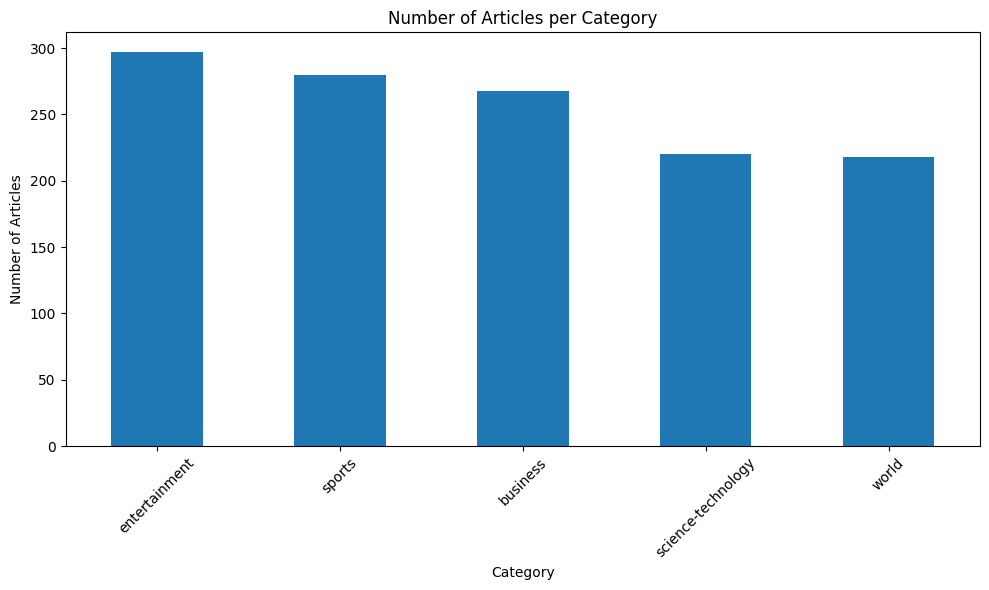

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the preprocessed dataset
dataset = pd.read_csv("preprocessed_dataset.csv")

# Check if the necessary column exists
if 'gold_label' in dataset.columns:
    # Count the number of articles in each category
    category_counts = dataset['gold_label'].value_counts()

    # Print the counts
    print("Number of articles in each category:")
    print(category_counts)

    # Plot the data
    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar')
    plt.title("Number of Articles per Category")
    plt.xlabel("Category")
    plt.ylabel("Number of Articles")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("The column 'gold_label' is missing in the dataset. Please check the file.")
